In [1]:
# Basic packages
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

# UMAP packages
import umap.umap_ as umap
from sklearn.decomposition import PCA
import sklearn.cluster as cluster
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score

#### Population Level Unsupervised Clustering
- Min-max normalization of these data occurred at the population level, meaning the minimum and maximum values used to normalize across each population (healthy, CD, UC) were those across the whole cohort. 

In [5]:
# Load Dataset
pop_all_labs = pd.read_csv('/Users/emmadyer/Desktop/ibd_long_project/data/pop_all_labs_imputed.csv')

# IBD and Healthy Patients
# Healthy-0, IBD-1
ibd_vs_healthy = pop_all_labs.copy()
ibd_vs_healthy['ibd_disease_code'] = ibd_vs_healthy['ibd_disease_code'].replace([2], 1)
ibd_vs_healthy = ibd_vs_healthy.drop('patient_id', axis=1)

In [6]:
# Generate UMAP
healthy_ibd_reducer = umap.UMAP()

healthy_ibd = ibd_vs_healthy.iloc[:, :-1]
em_healthy_ibd = healthy_ibd_reducer.fit_transform(healthy_ibd)
em_healthy_ibd.shape

(9300, 2)

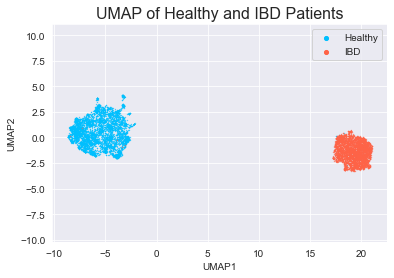

In [44]:
# Plot UMAP: IBD vs. Healthy Patients

healthy = em_healthy_ibd[:,0]
ibd = em_healthy_ibd[:,1]
group = ibd_vs_healthy.ibd_disease_code
color_dict = {1:'tomato', 0:'deepskyblue'}
labels = {0:'Healthy', 1:'IBD'}

fig, ax = plt.subplots()
for i, g in enumerate(np.unique(group)):
    ix = np.where(group == g)
    ax.scatter(healthy[ix], ibd[ix], c=color_dict[g], label=labels[g], s=0.1)
ax.legend(markerscale=13)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP of Healthy and IBD Patients', fontsize=16)
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.savefig('/Users/emmadyer/Desktop/ibd_long_project/figures/healthy_ibd_UMAP', dpi=300)
    

In [20]:
# UC and CD Patients
# UC-0, CD-1
uc_vs_cd = pop_all_labs.copy()
ibd_codes = [1,2]
uc_vs_cd = uc_vs_cd[uc_vs_cd['ibd_disease_code'].isin(ibd_codes)]
uc_vs_cd['ibd_disease_code'] = uc_vs_cd['ibd_disease_code'].replace([2], 0)
uc_vs_cd = uc_vs_cd.drop('patient_id', axis=1)

In [21]:
# Generate UMAP
uc_cd_reducer = umap.UMAP()

uc_cd = uc_vs_cd.iloc[:, :-1]
em_uc_cd = uc_cd_reducer.fit_transform(uc_cd)
em_uc_cd.shape

(3885, 2)

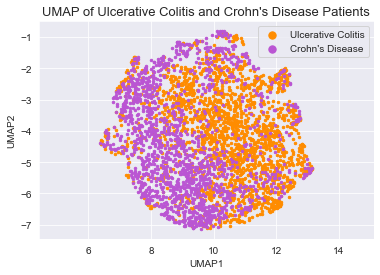

In [45]:
# Plot UMAP: UC vs. CD Patients

uc = em_uc_cd[:,0]
cd = em_uc_cd[:,1]
group = uc_vs_cd.ibd_disease_code
color_dict = {1:'mediumorchid', 0:'darkorange'}
labels = {0:'Ulcerative Colitis', 1:"Crohn's Disease"}

fig, ax = plt.subplots()
for g in np.unique(group):
    ix = np.where(group == g)
    ax.scatter(uc[ix], cd[ix], c=color_dict[g], label=labels[g], s=6)
ax.legend(markerscale=3)
plt.gca().set_aspect('equal', 'datalim')

plt.title("UMAP of Ulcerative Colitis and Crohn's Disease Patients", fontsize=13)
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.savefig('/Users/emmadyer/Desktop/ibd_long_project/figures/uc_cd_UMAP', dpi=300)
   